In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df = pd.read_excel (r'C:\Users\egemen.candir\Documents\QuantWorks\CorpBonds.xlsx', sheet_name="Sheet3", index_col='ID')

In [3]:
df.head()

,issuer,DATES,YTW,YTM
ID,,,,
BS317615 Corp,ROYAL BK CANADA LONDON,2022-07-04 00:00:00,NaN,29.37714
BS333082 Corp,TORONTO-DOMINION BANK,NaN,NaN,2.16290
BS334359 Corp,TORONTO-DOMINION BANK,NaN,NaN,2.18207
BR204666 Corp,CANADIAN IMPERIAL BANK,2022-07-04 00:00:00,NaN,9.16632
BR215955 Corp,BANK OF MONTREAL,2022-07-04 00:00:00,NaN,39.22793


In [4]:
df_clean = df.dropna()

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, BW045480 Corp to EH757898 Corp
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   issuer  460 non-null    object 
 1   DATES   460 non-null    object 
 2   YTW     460 non-null    float64
 3   YTM     460 non-null    float64
dtypes: float64(2), object(2)
memory usage: 18.0+ KB


In [8]:
df_clean = df_clean[(np.abs(stats.zscore(df_clean['YTW'])) < 3)]

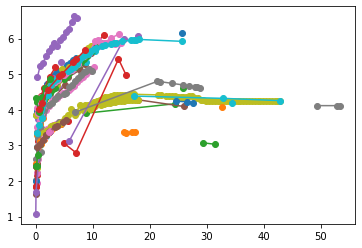

In [45]:
groups = df_clean.groupby('issuer')
fig, ax = plt.subplots()
for group in groups:
    subdf = group[1].sort_values('YTM')
    ax.plot(subdf['YTM'], subdf['YTW'], marker='o')

In [46]:
def exp_plateau(x, ym, y0, k):
    return ym - (ym - y0) * np.exp(-k * x)

"407 INTER INC CPN STRIP" ym: 5.66+/-0.09 y0: 3.80+/-0.05 k: 0.29+/-0.03
"AGT LTD COUPON STRIP" ym: 6.42+/-1.66 y0: 3.09+/-0.13 k: 0.23+/-0.17
"BANK OF NOVA SCOTIA" ym: 5.47+/-0.24 y0: 3.36+/-0.08 k: 0.43+/-0.10
"BCE COUPON STRIP" ym: 8.04+/-0.47 y0: 3.95+/-0.03 k: 0.05+/-0.01
"BRCOL GENERIC STRIP" ym: 4.30+/-0.01 y0: -0.12+/-0.68 k: 0.29+/-0.02
"CANADIAN IMP BK COMM HK" ym: 3.37+/-0.17 y0: 2.27+/-0.53 k: 5.88+/-5.41
"CANADIAN TIRE CPN STRIP" ym: 7.30+/-0.42 y0: 3.81+/-0.04 k: 0.08+/-0.02
"GREAT-WEST LIFECO CPN ST" ym: 55.02+/-918.22 y0: 3.79+/-0.18 k: 0.00+/-0.06
"GREATER TORONTO CPN STRP" ym: 6.31+/-0.44 y0: 3.56+/-0.04 k: 0.08+/-0.02
"HYDRO ONE STRIP" ym: 5.48+/-0.16 y0: 3.10+/-0.08 k: 0.19+/-0.03
"LEVIS QUE COUPON STRIP" ym: 3.88+/-0.08 y0: 2.81+/-0.03 k: 0.32+/-0.05
LOBLAW COS CPN STRIP couldn't be fit. Skipping
"NEW BRUN GENERIC CPN STP" ym: 4.32+/-0.01 y0: 2.59+/-0.07 k: 0.27+/-0.02
"SAGUENAY CPN STRIP" ym: 3.89+/-0.06 y0: 2.78+/-0.04 k: 0.33+/-0.05
"SUN LIFE FIN SPN STRIP" ym: 

Text(0, 0.5, 'YTW')

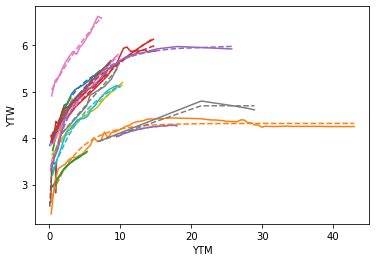

In [50]:
groups = df_clean.groupby('issuer')
fig, ax = plt.subplots()
param_names = ['ym', 'y0', 'k']
for group in groups:
    subdf = group[1].sort_values('YTM')
    if len(subdf) > 5:
        try:
            popt, pcov = curve_fit(exp_plateau, subdf['YTM'], subdf['YTW'])
        except RuntimeError:
            print(f"{group[0]} couldn't be fit. Skipping")
            continue
        
        l = ax.plot(subdf['YTM'], subdf['YTW'])
        ax.plot(subdf['YTM'], exp_plateau(subdf['YTM'], *popt), color=l[0].get_color(), ls='--')
        print(f'"{group[0]}"', *[f'{param_name}: {i:.2f}+/-{j:.2f}' for param_name, i, j in zip(param_names, popt, np.sqrt(np.diag(pcov)))])
        #ax.set_title(group[0])
ax.set_xlabel('YTM')
ax.set_ylabel('YTW')